# Installation de VSCode 

### Pour Windows 
https://code.visualstudio.com/docs/setup/windows

### Linux
https://code.visualstudio.com/docs/setup/linux

### 
Linux : on lance la commande 
```
code & 
```
dans un terminal 


# Pandas

Pandas est une librairie python qui permet de traiter des jeux de données.
Ce module contient des fonctions pour lire, nettoyer, manipuler et analyser des données.
En pratique, les données manipulées sont essentiellement issues d'un tableau (type tableau excel). 


Il a été crée en 2008 par Wes McKinney et le nom contient deux références aux termes :
* Panel Data
* Python Data Analysis

Code : 
* dépôt github [pandas](https://github.com/pandas-dev/pandas)
* installation via pip
* import classique

`import pandas`


Exemple

In [2]:
pip install pandas

# En ligne de commande
python3 -m pip install seaborn

SyntaxError: invalid syntax (3316626835.py, line 1)

Le type de données classique traité par pandas : les **Series** et les **DataFrame** 

## Les séries

Les séries : tableau 1d qui correspondant à une colonne d'un tableur, de données de n'importe quel type.

Exemple :


In [4]:
import pandas as pd
a = [1, 7, 2]
myvar = pd.Series(a)
print(myvar, type(myvar))

0    1
1    7
2    2
dtype: int64 <class 'pandas.core.series.Series'>


Si on ne précise rien, les valeurs sont étiquetées avec leur numéro d'indice :

In [ ]:
print(myvar[0])

### Création de labels

On peut créer ses propres labels à l'aide du mot-clé index. 

Exemple : 

In [ ]:
import pandas as pd

a = [1, 7, 2]

myvar = pd.Series(a, index = ["x", "y", "z"])

print(myvar,'\n')
print(myvar["y"])

### Création de séries à partir d'un dictionnaire
On peut créer une série à partir d'un dictionnaire, c'est à dire à partir d'une structure de données listées par clés/valeurs 

In [5]:
import pandas as pd

calories = {"day1": 420, "day2": 380, "day3": 390}

myvar = pd.Series(calories)
print(myvar,'\n')

myvar = pd.Series(calories, index = ["day1", "day2"])
print(myvar)

day1    420
day2    380
day3    390
dtype: int64 

day1    420
day2    380
dtype: int64


## Les DataFrames
Il s'agit de tableaux multi-dimensionnels. On a vu que les séries correspondaient à une colonne, les DataFrames représentent tout le tableau. 


In [ ]:
import pandas as pd

mydataset = {
  'Marques': ["BMW", "Volvo", "Ford"],
  'En stock': [3, 7, 2]
}
myvar = pd.DataFrame(mydataset)
print(myvar)

In [ ]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "durée": [50, 40, 45]
}

myvar = pd.DataFrame(data)
print(myvar)

Les DataFrames sont définies comme des tableaux avec des lignes et des colonnes; On peut donc identifier une ligne particulière.

L'attribut **loc** remplit ce rôle :

In [6]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "durée": [50, 40, 45]
}

df = pd.DataFrame(data)
print(df, '\n')


   calories  durée
0       420     50
1       380     40
2       390     45 



In [ ]:
# 0 : index de ligne 
print(df.loc[0])

Si on extrait une seule ligne, cela renvoie naturellement une série pandas. 
On peut extraire plusieurs lignes, indexées avec [].

In [ ]:
#use a list of indexes:
print(df.loc[[0, 1]])

Le résultat est aussi un DataFrame. 
On peut renommer chaque ligne :

In [ ]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])
print(df, '\n') 


#Extraire une seule ligne
print(df.loc["day2"])

## Lecture d'un fichier CSV et stockage sous forme de DataFrame

On peut charger en mémoire les fichiers au format CSV très facilement avec la méthode `read_csv()` :

In [ ]:
import pandas as pd

df = pd.read_csv('../data/data.csv')
print(df)

# Pour afficher tout le tableau si celui-ci est gros 
print(df.to_string()) 

In [ ]:
# Pour lire des fichiers excel on a besoin du paquet xlrd
pip install xlrd

In [ ]:
import pandas as pd
import xlrd

# Lecture au format excel 
df = pd.read_excel('../data/data.xls')
print(df) 

# Pour afficher tout le tableau si celui-ci est gros 
print(df.to_string()) 

## Affichage des DataFrames

* La méthode head() permet d'afficher les entêtes et un nombre spécifique de lignes en débutant depuis le haut du tableau 
(par défaut les 5 premières lignes)
* La méthode tail() permet d'afficher les entêtes et un nombre spécifique de lignes en partant de la fin du tableau 
(par défaut les 5 dernières lignes)
* La méthode info() permet d'afficher des informations à propos du jeu de données. 

In [ ]:
import pandas as pd
df = pd.read_csv('../data/data.csv')
print(df.head(10)) 
print(df.tail(10)) 
print(df.info) 


## Nettoyage des données 

Cette action vise à supprimer :
* les cellules vides, 
* les données qui n'ont pas le bon format,
* données "fausses",
* données dupliquées 
qui peuvent fausser les analyses statistiques faites sur le jeu de données. 

#### Suppression des lignes

Pour les celulles vides, la solution consiste à supprimer la ligne avec la méthode `dropna()`. Cette méthode détecte automatiquement les cellules vides et supprime les lignes correspondantes. 

---> Cela retourne un nouveau DataFrame sans modifier l'original. 

---> Pour le modifier explicitement, il faut utiliser l'argument inplace = True

In [ ]:
import pandas as pd
df = pd.read_csv('../data/data_light.csv')
print(df.to_string())

print('\n')
new_df = df.dropna()
print(new_df.to_string())

#  Remplacement du DataFrame 
df.dropna(inplace = True)
#print(df.to_string()) 

### Remplacement des cellules vides par une valeur 
* La méthode `fillna()` permet de remplacer une case vide par une valeur arbitraire passée en argument 
* Vous pouvez ne préciser qu'une seule colonne  

In [9]:
import pandas as pd

df = pd.read_csv('../data/data_light.csv')
print(df.to_string())


    Duration  Pulse  Maxpulse  Calories
0         60  110.0       130     409.1
1         60  117.0       145     479.0
2         60    NaN       135     340.0
3         45  109.0       175     282.4
4         45  117.0       148     406.0
5         60    NaN       127     300.0
6         60  110.0       136     374.0
7         45  104.0       134     253.3
8         30  109.0       133     195.1
9         60   98.0       124     269.0
10        60   98.0       124     269.0
11        60  103.0       147     329.3
12        60  100.0       120       NaN
13        60  106.0       128     345.3
14        60  104.0       132     379.3
15        60   98.0       123     275.0
16        60   98.0       120     215.2
17        60  100.0       120     300.0
18        45   90.0       112       NaN
19        60  103.0       123     323.0
20        45   97.0       125     243.0
21        60  108.0       131     364.2


In [10]:
df_new = df.fillna(10) 
print(df_new.to_string())

# On précise le nom de la colonne 
df["Calories"].fillna(10, inplace = True) 

    Duration  Pulse  Maxpulse  Calories
0         60  110.0       130     409.1
1         60  117.0       145     479.0
2         60   10.0       135     340.0
3         45  109.0       175     282.4
4         45  117.0       148     406.0
5         60   10.0       127     300.0
6         60  110.0       136     374.0
7         45  104.0       134     253.3
8         30  109.0       133     195.1
9         60   98.0       124     269.0
10        60   98.0       124     269.0
11        60  103.0       147     329.3
12        60  100.0       120      10.0
13        60  106.0       128     345.3
14        60  104.0       132     379.3
15        60   98.0       123     275.0
16        60   98.0       120     215.2
17        60  100.0       120     300.0
18        45   90.0       112      10.0
19        60  103.0       123     323.0
20        45   97.0       125     243.0
21        60  108.0       131     364.2


### Remplacement d'une cellule vide par un calcul 
Le module pandas fournit des fonctions de calcul statistique.

* moyenne : mean()
* médiane : median()
* mode (valeur la plus fréquente) : mode() 



In [11]:
import pandas as pd

df = pd.read_csv('../data/data_light.csv')
print(df ,'\n')
# Moyenne des valeurs de la colonne "calories"
moyenne_calories = df["Calories"].mean()
print('La moyenne des calories dépensées vaut ', moyenne_calories, '\n')

# On remplace les valeurs des calories par leur moyenne dans le set de données 
df["Calories"].fillna(moyenne_calories, inplace = True)
print(df)

    Duration  Pulse  Maxpulse  Calories
0         60  110.0       130     409.1
1         60  117.0       145     479.0
2         60    NaN       135     340.0
3         45  109.0       175     282.4
4         45  117.0       148     406.0
5         60    NaN       127     300.0
6         60  110.0       136     374.0
7         45  104.0       134     253.3
8         30  109.0       133     195.1
9         60   98.0       124     269.0
10        60   98.0       124     269.0
11        60  103.0       147     329.3
12        60  100.0       120       NaN
13        60  106.0       128     345.3
14        60  104.0       132     379.3
15        60   98.0       123     275.0
16        60   98.0       120     215.2
17        60  100.0       120     300.0
18        45   90.0       112       NaN
19        60  103.0       123     323.0
20        45   97.0       125     243.0
21        60  108.0       131     364.2 

La moyenne des calories dépensées vaut  317.56 

    Duration  Pulse  Maxpulse

### Traitement de mauvais format de données 
2 solutions :

* Effacer la ligne  (comme précédemment)
* Convertir les données au même format 


#### Effacer une ligne qui contient une donnée incorrecte 
Méthode `drop()`

Arguments :
* index des lignes à effacer 
* axe (lignes ou colonnes)
* inplace : remplace les données

In [ ]:
import pandas as pd

df = pd.read_csv('../data/data_light.csv')
df.drop([5,6], axis=0, inplace=True)
print(df.to_string())


# Suppression par index 
df.drop(df[(df['Maxpulse'] > 170) & (df['Maxpulse'] < 100)].index)


#### Convertir des données : exemple du format des dates  

Pour convertir des données de date au même format : méthode to_datetime() 

In [ ]:
import pandas as pd

df = pd.DataFrame({'date': ['10012023 4:15:30', '10042023 7:16:04','10062023 9:25:00',
                            '10142023 15:30:50', '10152023 18:15:00'],
                   'sales': [100, 140, 235, 120, 250]})

#view DataFrame
print(df)
df['date'] = pd.to_datetime(df['date'], format='%m%d%Y %H:%M:%S')

#view DataFrame
print(df)


# Autre exemple
s = pd.Series(['4/11/2017', '4/12/2017', '4/13/2017'])
print(s)
s1 = pd.to_datetime(s, format='%m/%d/%Y')
print(s1)


### Données fausses 
* mauvaise saisie, etc ...

* plusieurs choix (déjà vu précédemment) 
  * effacer la ligne 
  * remplacer la valeur fausse

Pour des gros jeux de données : automatisation du traitement 


In [ ]:
import pandas as pd

df = pd.read_csv('../data/data_light.csv')

# Remplacement
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.loc[x, "Duration"] = 120

    # Suppression de lignes 
for x in df.index:
  if df.loc[x, "Duration"] > 120:
    df.drop(x, inplace = True) 

### Supprimer les doublons 

Pour supprimer les doublons on peut utiliser la méthode `duplicate()`. 
Cette méthode renvoie un booléen Vrai si la ligne est dupliquée. 

Pour supprimer la ligne dupliquée, on utilise la méthode `drop_duplicates()`

In [ ]:
import pandas as pd

df = pd.read_csv('../data/data_light.csv')
print(df.duplicated(), '\n')

df.drop_duplicates(inplace = True)
print(df)

## Analyse de données
* On a vu le calcul de la moyenne et de la médiane d'une colonne
* On peut calculer des corrélations avec la méthode `corr()`
* Elle ignore les colonnes de données "non-numériques"
* Le résultat est une "matrice" de corrélation entre les colonnes, variant de -1 à 1 

In [ ]:
import pandas as pd

df = pd.read_csv('../data/data.csv')
print(df.corr()) 

          Duration     Pulse  Maxpulse  Calories

Duration  1.000000 -0.155408  0.009403  0.922717

Pulse    -0.155408  1.000000  0.786535  0.025121

Maxpulse  0.009403  0.786535  1.000000  0.203813

Calories  0.922717  0.025121  0.203813  1.000000


## Exercice 

Le fichier data_light.csv contient des cellules avec une valeur NaN dans une colonne. 
Supprimer les lignes qui contiennent des NaN dans le fichier data.csv et calculer la moyenne de cette colonne. 

* Ouvrir et analyser visuellement le fichier ../data/data_light.csv
* Supprimer les lignes qui contiennent un NaN 
* Calculer la médiane de la colonne 

# Module Matplotlib 

+ une des bibliothèques python les plus utilisées pour représenter des graphiques en 2D
+ contient beaucoup de fonctionnalités
+ installation avec le programme pip

In [ ]:
pip install --user -U matplotlib
# En ligne de commande
python3 -m pip install --user -U matplotlib

Importer le module dans notre programme

In [ ]:
import matplotlib.pyplot as plt

## Utiliser les commandes *plot*, *show* et *close*

In [ ]:
import matplotlib.pyplot as plt

plt.plot()
plt.show()
plt.close()

# I. Tracé de courbes 2D : la commande *plot()*

+ Elle peut ne prendre aucun argument (et ne fait rien)
+ prend une liste en argument : [a, b, c]
  + va relier le points A(0, a) au point B(1, b) et le point B au point C(2, c)

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0, 1, 2])

In [ ]:
plt.show()

In [ ]:
plt.savefig("graphique.png") # Sauve la figure
plt.close()


+ On peut passer deux listes en arguments x = [0, 1, 2] et y = [1, 0, 2]
+ plt.plot(x,y) va tracer les ordonnées y en fonctions des abcisses x

Exercice : tracer un triangle fermé qui passe par les points (0,0) (1,1) et (-1,1)


#### Superposition des plots

+ On peut utiliser plusieurs fois la commande 

In [ ]:
import matplotlib.pyplot as plt

x = [0, 1, 0]
y = [0, 1, 2]

x1 = [0, 2, 0]
y1 = [2, 1, 0]

x2 = [0, 1, 2]
y2 = [0, 1, 2]

plt.plot(x, y)
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()
plt.close()

+ Lui passer plusieurs couples de données en arguments

In [ ]:
import matplotlib.pyplot as plt

x = [0, 1, 0]
y = [0, 1, 2]

x1 = [0, 2, 0]
y1 = [2, 1, 0]

x2 = [0, 1, 2]
y2 = [0, 1, 2]

plt.plot(x, y, x1, y1, x2, y2)
plt.show()
plt.close()

#### Personnalisation

On peut personnaliser les graphiques en changeant les titres, les axes, les légendes, le type de ligne avec des mots clés :

- title
- label
- legend
- color

A placer avant la commande `show()`

Exemple 

In [ ]:
import matplotlib.pyplot as plt

x = [0.25, 0.25, 1.25, 0.5, 1, 0.25, 0.6, 0, -0.6, -0.25, -1, -0.5, -1.25, -0.25, -0.25, 0.25]
y = [0, 0.5, 0.5, 1, 1, 1.5, 1.5, 2, 1.5 , 1.5, 1, 1, 0.5, 0.5, 0, 0]
plt.plot(x, y, '-.', color = "green", lw = 2)
plt.title("Mon beau sapin")
plt.axis('equal')
plt.xlabel("C'est Noel")
plt.ylabel("Vive le vent")
plt.show()
plt.close()

#### Tracés des fonctions avec plot

+ Import de la fonction cosinus depuis le module *numpy*


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 2 * np.pi, 0.01) # On crée un array qui va de 0 à 2pi exclu avec un pas de 0.01
plt.plot(x, np.cos(x)) # On utilise plot avec l'array x et l'array cos(x)
plt.show()
plt.close()

+ Tracé d'une fonction définie par l'utilisateur

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 2 * np.pi, 0.01) # On crée un array qui va de 0 à 2pi exclu avec un pas de 0.01
y1=x**2
y2=2*x+2
plt.plot(x, y1, x, y2) # On utilise plot avec l'array x et y1 (tracé 1) et ensuite avec x et y2 
plt.show()
plt.close()

Exercice : tracé la fonction sinus(3*pi*x) pour x entre 0 et 100 (pi vient du module numpy et s'écrit np.pi)

### Tracé d'un nuage de points : la commande `scatter()`

+ Arguments :
    * Deux tableaux de même dimension : les abcisses et les ordonnées 
    * c : couleur
    * label : légende
    * ...

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

plt.scatter(x, y, c='cyan', label='Données fixées arbitraiement')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Génération de 20 flottants aléatoires 
x1 = pd.Series(np.random.rand(20) - 0.5)
y1 = pd.Series(np.random.rand(20) - 0.5)

x2 = pd.Series(np.random.rand(20) + 0.5)
y2 = pd.Series(np.random.rand(20) + 0.5)

# Personnalisation du graphe
plt.title('Scatter Plot')
plt.ylabel('Range of y values')
plt.xlabel('Range of x values')

# plot
plt.scatter(x1, y1, c='cyan', label='Données aléatoires -0.5')  # 'c' parameter is the colour and 'label' is the text for the legend
plt.scatter(x2, y2, c='blue', label='Données aléatoires +0.5')

plt.legend(loc=4)  # Position de la légende : 1,2,3 and 4 = top-right, top-left, bottom-left et bottom-right
# Affichage du graphique
plt.show()


### Tracé de diagrammes : la commande `bar()`

+ Arguments : 
  + liste des coordonnées x (array)
  + Valeurs de hauteur de barres (array)
  + Largeur des barres
  + Bottom (defaut=0)
  + align='center' 



In [ ]:
import matplotlib.pyplot as plt
x = [10,10,20,20,20,30,30,30,40,40]
x1 = [10,20,30,40]
y1 = [2,3,3,2]
plt.bar(x1, y1, width=2.8, color='r', edgecolor='w') 
plt.show()

### Tracé d'histogrammes : la commande `hist()`

+ Calcul automatique de la fréquence
+ Arguments
  + liste des données 
  + Nombre d'intervalles

In [ ]:
import matplotlib.pyplot as plt
x = [10,10,20,20,20,30,30,30,40,40]
plt.hist(x,4, color='g') # 4 nombre d'intervalles (arg. bins)
plt.show()


#### Personnalisation de l'histogramme


In [ ]:
import matplotlib.pyplot as plt
x = [10,10,20,20,20,30,30,30,40,40]
plt.hist(x,4 ,edgecolor = 'white', color='green')
plt.xticks([10,20,30,40])
plt.show()

### Exercice 1.
Réaliser le graphe de la fonction $y(t) = v_0t − \frac{1}{2} gt^2$ pour $v_0 = 10$, $g = 9.81$, et $t \in [0, 2v0 / g]$. 

Le label sur l’axe des x devra être “temps (s)” et le label sur l’axe des y “hauteur (m)”.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
v0=10.
g=9.81
t = np.arange(0, 2*v0/g, 0.1)
y=v0*t -0.5*g*t**2
plt.plot(t,y)
plt.xlabel("temps (s)")
plt.ylabel("hauteur (m)")
plt.show()

### Exercice 2

* Créer une figure qui trace 
  * à gauche un nuage de flottants aléatoires (x,y)
  * à droite le nuage de points (x, sin(y)) 

--> Astuce : utiliser la commande subplot

```
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x1, y1)
ax2.plot(x2, y2)
```

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# La librairie Seaborn 

* Librairie de visualisation basée sur **matplotlib** 
* Faite pour le tracé de données statitiques
* Bien adaptées aux structures de données **pandas**, elle ajoute une interaction avec les DataFrames afin de faciliter grandement la génération de graphiques à partir de ceux-ci; 
* Seaborn propose un catalogue – très – dense de fonctions graphiques pour répondre le plus précisément possible à une problématique donnée.
* En comparaison, Matplotlib offre une flexibilité accrue en termes de customisation et des performances parfois supérieures.
Il peut donc s’agir d’une meilleure option dans certaines situations.
* Seaborn apporte une variété de thèmes et de couleurs plus importants qui permettent un rendu de meilleure qualité (darkgrid, whitegrid, dark, white, and ticks)

### Définition des données 
Dans un premier temps, on définit le DataFrame qui va être utilisé pour tracer le graphique, via l’argument  data;

`load_dataset()` : charge des exemples depuis un dépôt sous forme de DataFrames pandas disponibles sur un dépôt. 

In [16]:
# Import seaborn
import seaborn as sns
import pandas as pd

# Load an example dataset
tips = sns.load_dataset("tips")
print(tips.head(10),"\n") 

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2 



   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0
5        60    102       127     300.0
6        60    110       136     374.0
7        45    104       134     253.3
8        30    109       133     195.1
9        60     98       124     269.0


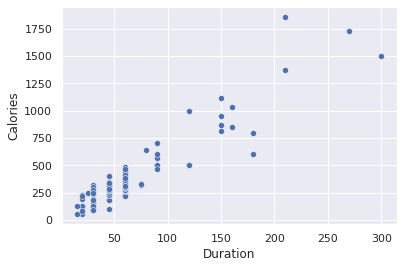

In [17]:
# Import seaborn
import seaborn as sns
import pandas as pd

# Read a csv file
df = pd.read_csv('../data/data.csv')
print(df.head(10))
res = sns.scatterplot(x="Duration", y="Calories", data=df)

### Tracé de courbes classiques 

+ La méthode `.lineplot()` permet le tracé d'une ou plusieurs courbes classiques
+ La méthode `.barplot(data=None, *, x=None, y=None, hue=None, ...)`
+ La méthode `.histplot(data=None, *, x=None, y=None, hue=None, ...)`


In [ ]:
import seaborn as sns
import pandas as pd

flights = sns.load_dataset("flights")
flights.head()
#sns.lineplot(data=flights, x="year", y="passengers", hue="month", palette="rocket")

In [ ]:
import seaborn as sns
import pandas as pd

flights = sns.load_dataset("flights")
sns.lineplot(data=flights, x="year", y="passengers", hue="month", palette="icefire")

+ La méthode `.histplot(data=None, *, x=None, y=None, hue=None, ...)`
  + permet d'afficher des histogrammes 
  + fournit également des estimation sde densité de probabilité (kde=true)

In [ ]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

In [ ]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", element="step", kde=True, hue="species")

### Tracé d'un nuage de points 

La méthode `.scatterplot()` permet le tracé un nuage de points en ajoutant des informations supplémentaires sur les points. 

Arguments :

+ data : données à représenter (DataFrame)
+ x,y : axe de la figure
+ hue : donnée supplémentaire à représenter
+ size, style : informations suppémentaires 
+ arguments de customisation : palette, etc .... 

In [ ]:
# Exemple 
import seaborn as sns
tips = sns.load_dataset("tips")
print(tips.head(10))

# Tracé du nuage de points avec seaborn 
sns.scatterplot(data=tips, x="total_bill", y="tip")


In [ ]:
# Exemple 
import seaborn as sns
tips = sns.load_dataset("tips")

# Tracé du nuage de points avec seaborn 
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")

### Relation entre données multicolonne
    
`.relplot()` : effectue le tracé des "relations entre les données".

+ Arguments :
  + data : spécifie le DataFrame à tracer
  + x,y : axes
  + raw, col : spécifie la variable qui va indexer la ligne ou la colonne de figures (variable)
  + hue : variable supplémentaire à représenter avec une palette de couleur 
  + style : variable supplémentaire à représenter avec le style des points 
  + size : variable supplémentaire à représenter avec la taille des points
  + kind : scatter, line
  
  
+ Reprend les fonctions scatter et lineplot déjà vues dans une seule fonction et permet de représenter graphiquement des **relations supplémentaires**.

In [ ]:
# Relation entre données : relplot
import seaborn as sns
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",palette="rocket_r")



### Tracé par catégorie 

La fonction `catplot()` effectue des tracés qui permettent sur une seule figure de tracer des données numériques par catégorie.

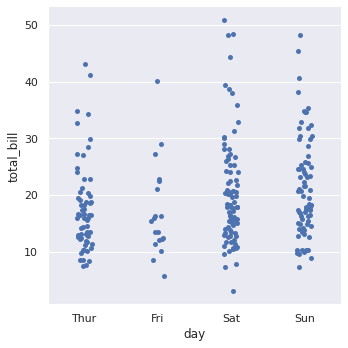

In [13]:
tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill")


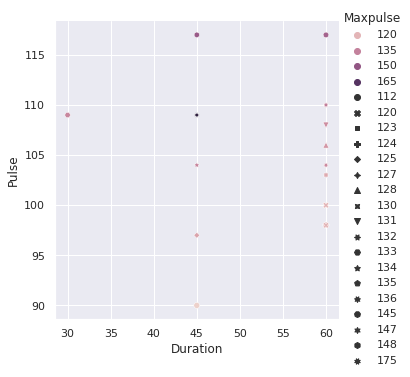

In [12]:
# Exemple à ne pas suivre !
import seaborn as sns
import pandas as pd

# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=df,
    x="Duration", y="Pulse",
    hue="Maxpulse", style="Maxpulse",
)

Certaines fonctions contiennent un traitement statistique 

* la méthode `relplot` avec des données qui dépendent d'un index temps : tracé de la moyenne et de l'écart-type 
* la méthode `lmplot()` : ajout d'un modèle de regression linéaire dans un "scatterplot"

Les arguments sont sensiblement les mêmes dans chacun des cas. 

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

### Ajout d'un modèle de regression linéaire dans un 'scatterplot' : `lmplot()`

In [ ]:
# lmplot : basée sur scatterplot, représente un modèle de regression linéaire pour chaque type de données
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", palette='Set2')


In [ ]:
### Voir également jointplot et pairplot

### Personnalisation 
* Thème : choix du thème général des figures 
* Contexte : contexte de taille de graphiques suivant l'utilisation que l'on veut en faire :
   * publication 
   * notebook (défaut)
   * présentation
   * poster

In [ ]:
# Import seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Thème et palette 
# Palettes : pastel,  husl, Set2, Spectral, light:#5A9
sns.set_theme()
#sns.set_theme(style="whitegrid", palette="husl")


# Context : paper, notebook, talk, and poster
sns.set_context("talk")

sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size"
)

### Exercice 
1. Vous ouvrez le fichier https://raw.githubusercontent.com/benjaminmrl/data-4452741/main/prets_final.csv et vous lisez son contenu

2. Vous affichez les éléments suivant l'énnoncé ci-dessous : 

1.Tracé du bénéfice mensuel en fonction du revenu du client

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ouverture du fichier 
## Vous pouvez consulter ce fichier : https://raw.githubusercontent.com/benjaminmrl/data-4452741/main/prets_final.csv

## Lecture du contenu 

## Affichage (scatterplot)


2. Vous ajouterez en couleur l'information la ville de l'agence où a été réalisé le prêt


3. Vous ajouterez finalement le type de prêt comme colonne de graphique 